In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#df = pd.read_csv("/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv")
df = pd.read_csv("C:/Users/pooja1/Downloads/archive (3)/customer_shopping_data.csv")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [8]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [9]:
df.shape

(99457, 10)

In [10]:
df.size

994570

In [11]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [12]:
df.duplicated().value_counts()

False    99457
dtype: int64

In [13]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [17]:
df['invoice_no']=df['invoice_date'].apply(pd.to_datetime)

C:\Users\pooja1\AppData\Local\Temp\ipykernel_50988\795202810.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['invoice_no']=df['invoice_date'].apply(pd.to_datetime)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  object        
 9   shopping_mall   99457 non-null  object        
 10  inovice_no      99457 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 8.3+ MB


In [19]:
df.nunique()

invoice_no          797
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
inovice_no          797
dtype: int64

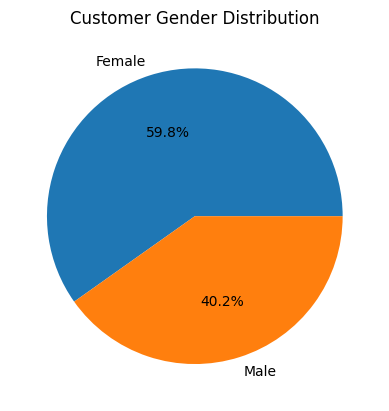

In [20]:
gender_count = df['gender'].value_counts()

fig,ax = plt.subplots()
ax.pie(gender_count, labels = gender_count.index, autopct = '%1.1f%%')
ax.set_title('Customer Gender Distribution')
plt.show()

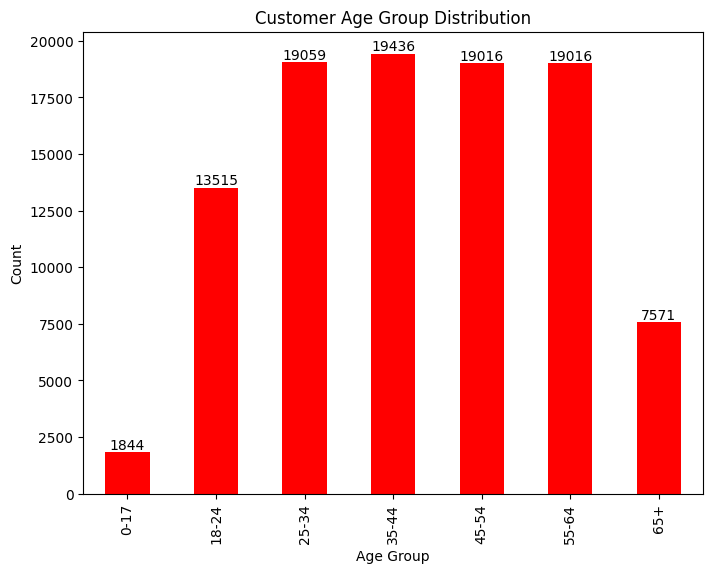

In [25]:
age_groups = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']


df['Age Groups'] =pd.cut(df['age'], bins=age_groups, labels =labels)

fig,ax = plt.subplots(figsize = (8,6))
df['Age Groups'].value_counts().sort_index().plot(kind ='bar', color = 'red', ax =ax)
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Customer Age Group Distribution')

for i in ax.containers:
    ax.bar_label(i)
plt.show()


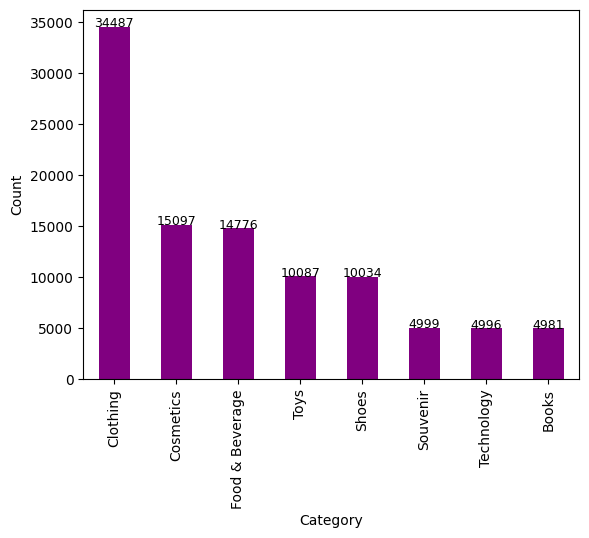

In [29]:
category_count = df['category'].value_counts()
category_count.plot(kind = 'bar', color = 'purple')
plt.xlabel('Category')
plt.ylabel('Count')

for i, count in enumerate(category_count):
    plt.text(i, count+10, str(count), ha ='center', fontsize = 9)
plt.show()

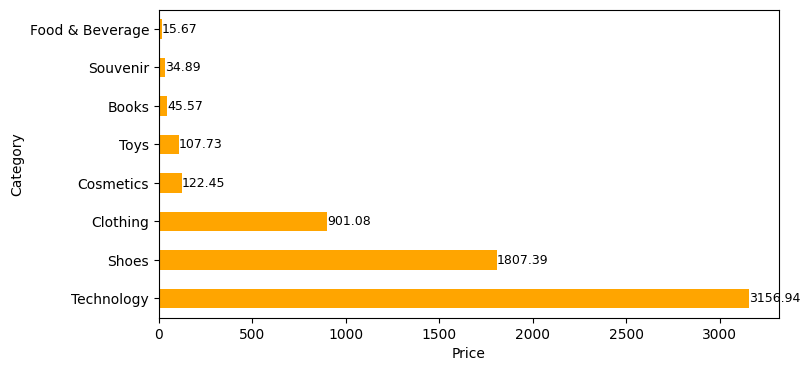

In [31]:
category_mean = df.groupby('category')['price'].mean().sort_values(ascending = False)
plt.figure(figsize = (8,4))
category_mean.plot(kind = 'barh', color = 'orange')

#category_count.plot(kind = 'bar', color = 'purple')
plt.xlabel('Price')
plt.ylabel('Category')

for i, mean in enumerate(category_mean):
    plt.text(mean+0.1, i, str(round(mean, 2)), va ='center', fontsize = 9)
plt.show()

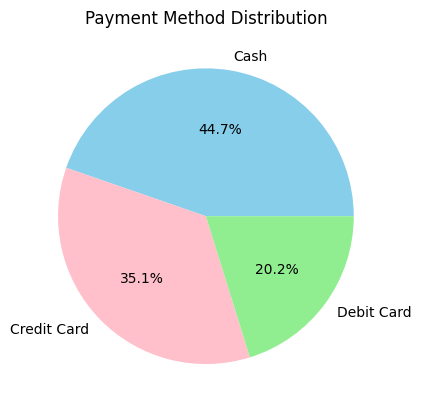

In [33]:
pay_count =df['payment_method'].value_counts()
colors = ['skyblue', 'pink', 'lightgreen']


fig,ax = plt.subplots()
ax.pie(pay_count, labels = pay_count.index, colors = colors, autopct = '%1.1f%%')
ax.set_title('Payment Method Distribution')
plt.show()

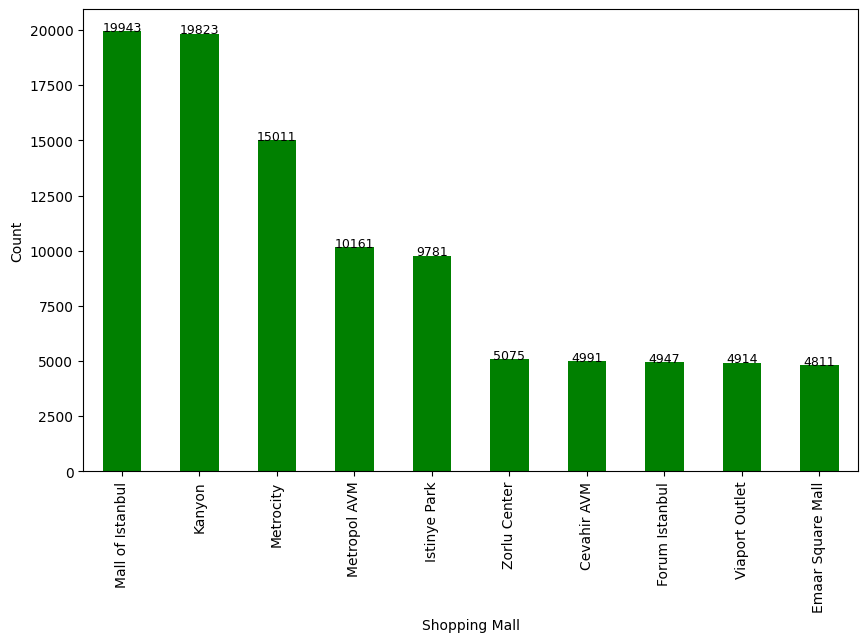

In [35]:
mall_count = df['shopping_mall'].value_counts()


fig, ax = plt.subplots(figsize= (10,6))
mall_count.plot(kind = 'bar', color = 'green')
plt.xlabel('Shopping Mall')
plt.ylabel('Count')

for i, count in enumerate(mall_count):
    plt.text(i, count+10, str(count), ha ='center', fontsize = 9)
plt.show()

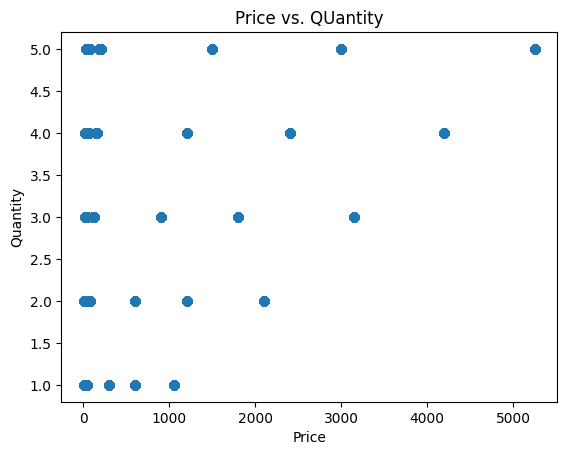

In [36]:
plt.scatter(x = 'price', y ='quantity', data = df)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price vs. Quantity')
plt.show()